## TSF-GRIP - Task 5 : Exploratory Data Analysis on Sports Data

## Author : Venkatesan Murugesan

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
matches=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### About dataset

In [5]:
matches.shape

(756, 18)

In [6]:
deliveries.shape

(179078, 21)

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Pre - Processing

Checking for duplicates in data

In [13]:
matches[matches.duplicated()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


Checking null values in matches data 

In [14]:
matches[matches.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


We can fill NaN by seeing the venue ie, Dubai International Cricket Stadium. So I filled NaN with 'Dubai'

In [15]:
matches.city.fillna("Dubai",inplace=True)

In [16]:
matches.drop(columns=["umpire1","umpire2","umpire3"],inplace=True)

In [17]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


Now check isnull function again

In [18]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [19]:
matches[matches.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


Here, when the value of winner is NaN, the corresponding row's player_of_match column is also NaN. Sice there cannot be a player_of_match if there is no winner, the null values are justified.

In [20]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


seasons present in data

In [21]:
np.sort(matches.season.unique())

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

teams present in data

In [22]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [23]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [24]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Here, we can see Pune repeated three times and Delhi repeated two times. So I changed all the teams with current names

In [25]:
matches.team1.replace('Pune Warriors','Rising Pune Supergiant',inplace=True)
matches.team1.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
matches.team1.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.team1.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

In [26]:
matches.team2.replace('Pune Warriors','Rising Pune Supergiant',inplace=True)
matches.team2.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
matches.team2.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.team2.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

In [27]:
matches.toss_winner.replace('Pune Warriors','Rising Pune Supergiant',inplace=True)
matches.toss_winner.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
matches.toss_winner.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.toss_winner.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

In [28]:
matches.winner.replace('Pune Warriors','Rising Pune Supergiant',inplace=True)
matches.winner.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
matches.winner.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.winner.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

### EDA and Visualization

#### Total wins for each Team

In [29]:
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

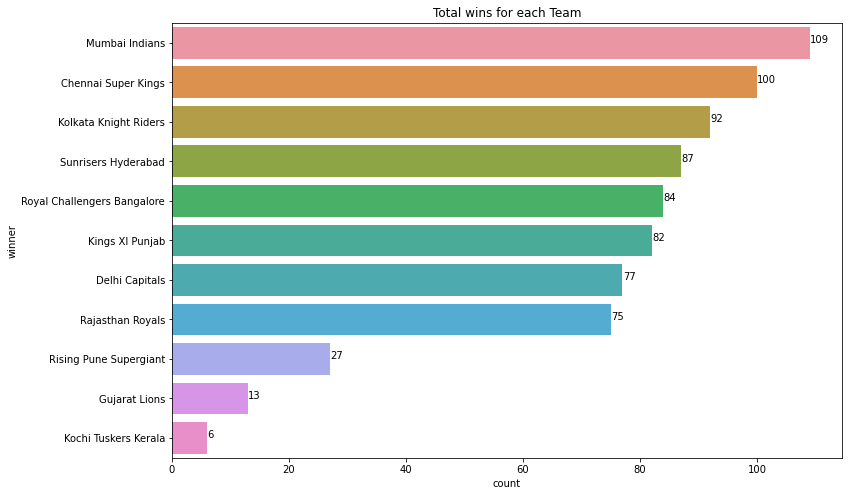

In [30]:
plt.figure(figsize=(12,8))
plt.title('Total wins for each Team')
ax=sns.countplot(y=matches['winner'],order = matches['winner'].value_counts().index)
for i in ax.patches:
    ax.text(i.get_width()+0.05,i.get_y()+.40,i.get_width())
plt.show()

#### Most win of the Season

In [31]:
matches.pivot_table(index=['season','winner'],values='result',aggfunc='count')

result
season winner                             
2008   Chennai Super Kings               9
       Delhi Capitals                    7
       Kings XI Punjab                  10
       Kolkata Knight Riders             6
       Mumbai Indians                    7
...                                    ...
2019   Kolkata Knight Riders             6
       Mumbai Indians                   11
       Rajasthan Royals                  5
       Royal Challengers Bangalore       5
       Sunrisers Hyderabad               6

[100 rows x 1 columns]

In [32]:
seasons=sorted(matches['season'].unique())
most_win={}
for i in seasons:
    most_win[i]=matches[matches.season==i]['winner'].value_counts().index[0]
most_win=pd.DataFrame.from_dict([most_win]).T
most_win.rename(columns={0:'most_wins'},inplace=True)
most_win.index.name='year'
most_win

,most_wins
year,
2008,Rajasthan Royals
2009,Delhi Capitals
2010,Mumbai Indians
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kings XI Punjab
2015,Chennai Super Kings
2016,Sunrisers Hyderabad


#### Most win in city they played

In [33]:
wins=matches.pivot_table(index=['season','winner','city'],values='id',aggfunc='count')
wins.rename(columns={'id':'win_count'},inplace=True)
wins

win_count
season winner                      city                 
2008   Chennai Super Kings         Bangalore           1
                                   Chandigarh          1
                                   Chennai             3
                                   Delhi               1
                                   Hyderabad           1
...                                                  ...
2019   Royal Challengers Bangalore Bengaluru           3
                                   Kolkata             1
                                   Mohali              1
       Sunrisers Hyderabad         Delhi               1
                                   Hyderabad           5

[454 rows x 1 columns]

In [34]:
wins.reset_index(inplace=True)

In [35]:
x=[]
for i in range(2008,2020):
    x.append(wins[wins.season==i].nlargest(1,'win_count'))

In [36]:
x

[    season            winner    city  win_count
 26    2008  Rajasthan Royals  Jaipur          7,
     season          winner    city  win_count
 44    2009  Delhi Capitals  Durban          3,
     season          winner    city  win_count
 93    2010  Mumbai Indians  Mumbai          8,
      season               winner     city  win_count
 108    2011  Chennai Super Kings  Chennai          8,
      season               winner     city  win_count
 152    2012  Chennai Super Kings  Chennai          6,
      season          winner    city  win_count
 220    2013  Mumbai Indians  Mumbai          8,
      season                 winner     city  win_count
 258    2014  Kolkata Knight Riders  Kolkata          4,
      season               winner     city  win_count
 279    2015  Chennai Super Kings  Chennai          6,
      season                       winner       city  win_count
 346    2016  Royal Challengers Bangalore  Bangalore          5,
      season               winner       city 

#### Most Toss winner

In [37]:
matches.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Sunrisers Hyderabad            89
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Rising Pune Supergiant         33
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

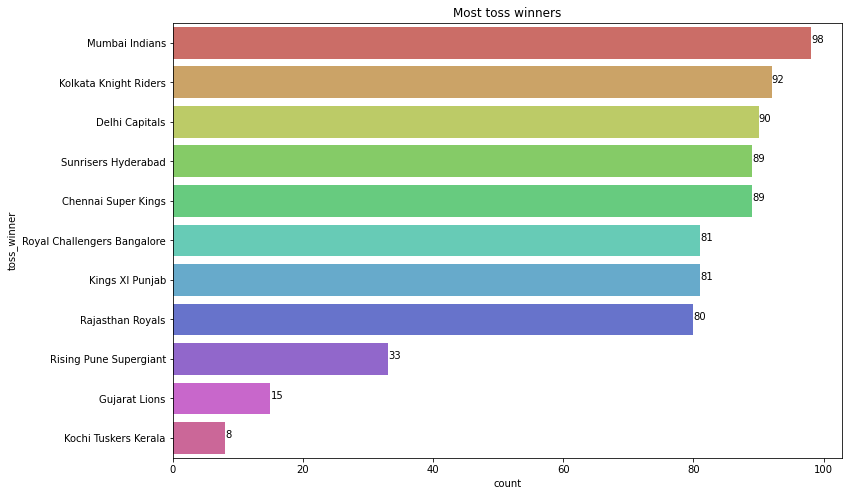

In [38]:
plt.figure(figsize=(12,8))
plt.title('Most toss winners')
ax=sns.countplot(y=matches['toss_winner'],order = matches['toss_winner'].value_counts().index,palette="hls")
for i in ax.patches:
    ax.text(i.get_width()+0.05,i.get_y()+.40,i.get_width())
plt.show()

#### Toss impact on Games

##### Batting first

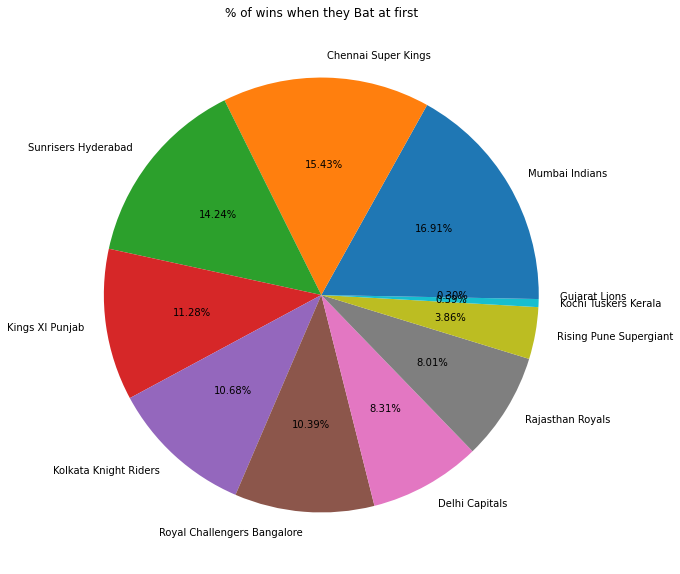

In [39]:
batting_first = matches[matches['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.title('% of wins when they Bat at first',loc='center')
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.2f%%')
plt.show()

##### Batting second

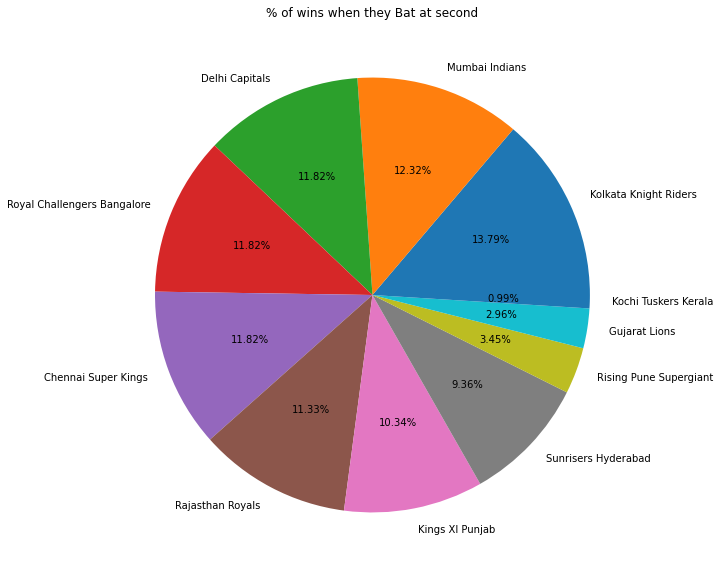

In [40]:
batting_second = matches[matches['win_by_wickets']!=0]
plt.figure(figsize=(10,10))
plt.title('% of wins when they Bat at second',loc='center')
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.2f%%')
plt.show()

### Winning Trend of top 3 teams

In [41]:
winning_trend=pd.crosstab(matches.season,matches.winner)
winning_trend=winning_trend[['Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders']]

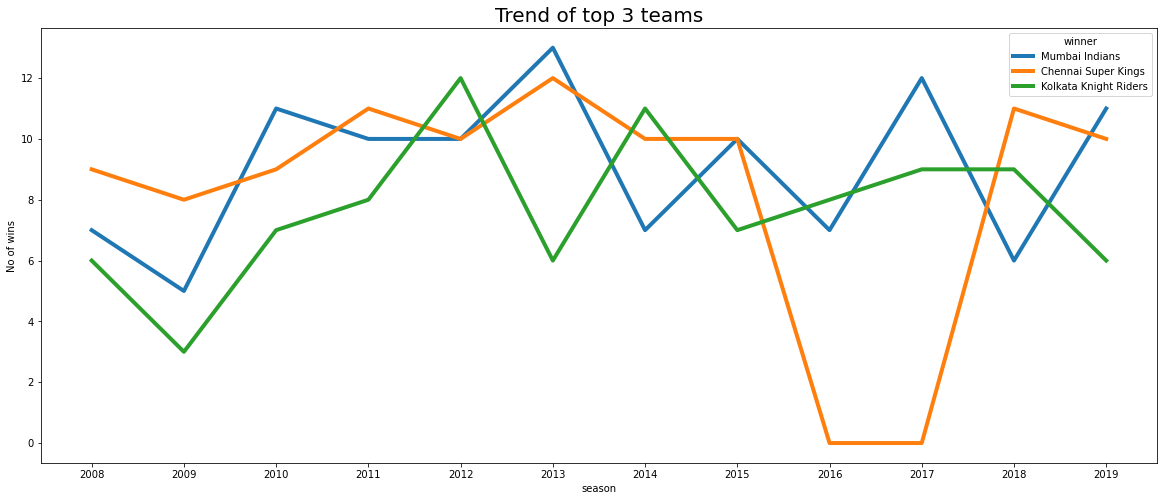

In [42]:
winning_trend.plot(linewidth=4,figsize=(20,8),xticks=matches.season.unique(),ylabel='No of wins',fontsize=10)
plt.title('Trend of top 3 teams',fontsize=20)
plt.show()

No. of matches won is 0 for csk in the year 2016 and 2017 since during a ban was impose on csk during that period

### Finals winner

checking data type of date column and convert it to datetime format

In [43]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
dtype: object

In [44]:
matches.date=pd.to_datetime(matches.date)

Extracting final match date from data

In [45]:
final=matches.pivot_table(index='season',values='date',aggfunc='max')
final

,date
season,
2008,2008-06-01
2009,2009-05-24
2010,2010-04-25
2011,2011-05-28
2012,2012-05-27
2013,2013-05-26
2014,2014-06-01
2015,2015-05-24
2016,2016-05-29


Checking final matches

In [46]:
finals=matches[matches.date.isin(final.date)]
finals

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,2009-05-24,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium


2018 repeated two times. so we have to check once again

In [47]:
matches[matches.season==2018]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
636,7894,2018,Mumbai,2018-07-04,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium
637,7895,2018,Mohali,2018-08-04,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ..."
638,7896,2018,Kolkata,2018-08-04,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens
639,7897,2018,Hyderabad,2018-09-04,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal"
640,7898,2018,Chennai,2018-10-04,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk"
641,7899,2018,Jaipur,2018-11-04,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium
642,7900,2018,Hyderabad,2018-12-04,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,1,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
643,7901,2018,Bengaluru,2018-04-13,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium
644,7902,2018,Mumbai,2018-04-14,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,JJ Roy,Wankhede Stadium
645,7903,2018,Kolkata,2018-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,B Stanlake,Eden Gardens


From data we can find the finals date is 27.05.2018

In [48]:
final.date.replace('2018-12-05','2018-05-27',inplace=True)

Now final matches

In [49]:
finals=matches[matches.date.isin(final.date)]
finals

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,2009,Johannesburg,2009-05-24,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,6,0,A Kumble,New Wanderers Stadium
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium


Finals winner in each season

In [50]:
result=finals[['season','winner']]
result.sort_values('season',inplace=True)
result.set_index('season')

,winner
season,
2008,Rajasthan Royals
2009,Sunrisers Hyderabad
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad


In [51]:
finals.winner.value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Sunrisers Hyderabad      2
Kolkata Knight Riders    2
Rajasthan Royals         1
Name: winner, dtype: int64

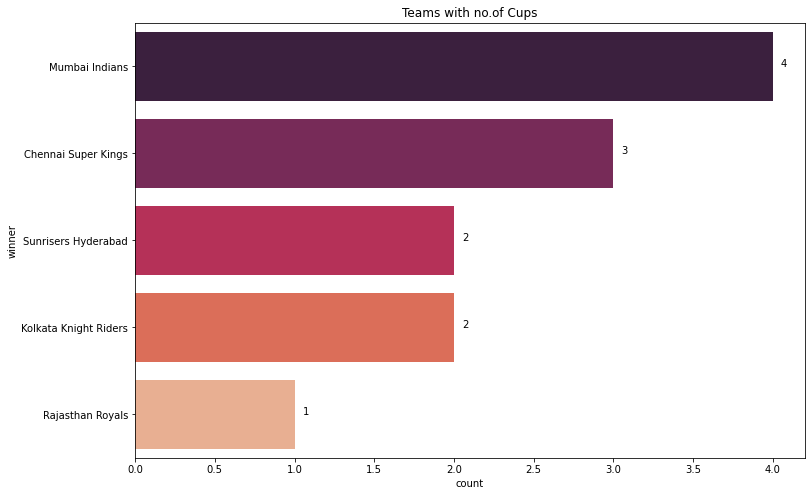

In [52]:
plt.figure(figsize=(12,8))
plt.title('Teams with no.of Cups')
ax=sns.countplot(y=finals['winner'],order = finals['winner'].value_counts().index,palette="rocket")
for i in ax.patches:
    ax.text(i.get_width()+0.05,i.get_y()+.40,i.get_width())
plt.show()

#### Maximum win by wickets and win by runs

In [53]:
matches.win_by_runs.max()

146

In [54]:
matches[matches.win_by_runs==matches.win_by_runs.max()][['season','team1','team2','winner']]

,season,team1,team2,winner
43,2017,Mumbai Indians,Delhi Capitals,Mumbai Indians


In [55]:
matches.win_by_wickets.max()

10

In [56]:
matches[matches.win_by_wickets==matches.win_by_wickets.max()][['season','team1','team2','winner']]

,season,team1,team2,winner
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
34,2017,Delhi Capitals,Kings XI Punjab,Kings XI Punjab
71,2008,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad
119,2009,Kings XI Punjab,Delhi Capitals,Delhi Capitals
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
542,2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


#### No of matches in different cities

In [57]:
matches.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
Dubai               7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

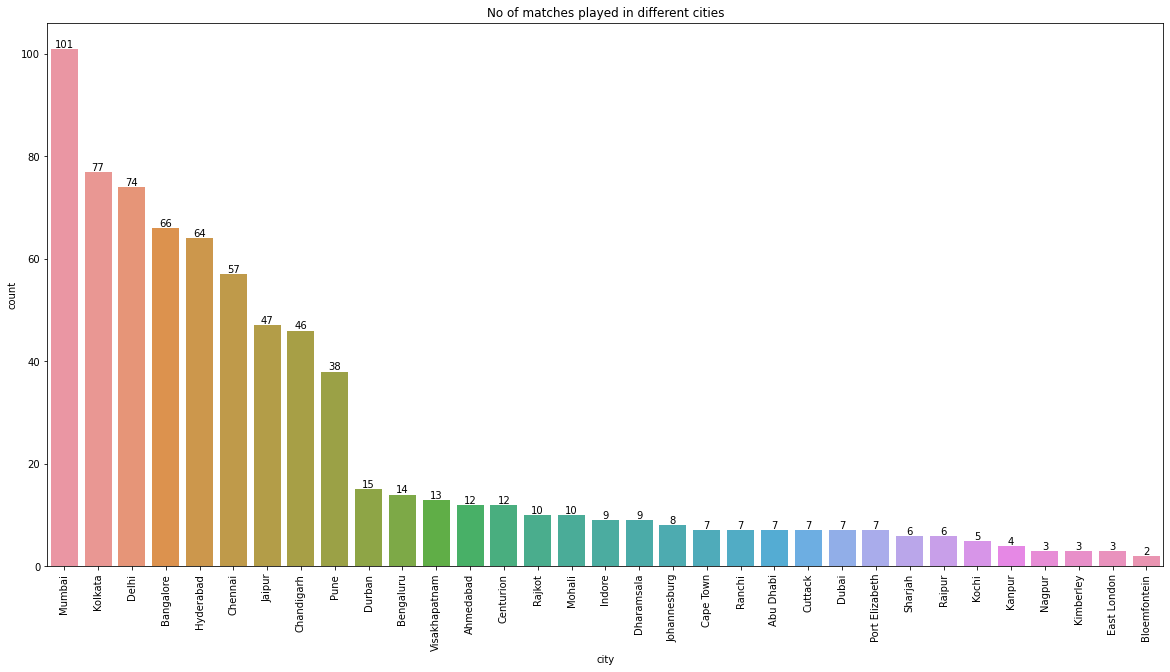

In [58]:
plt.figure(figsize=(20,10))
plt.title('No of matches played in different cities')
ax=sns.countplot(x=matches.city,order = matches.city.value_counts().index)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+.3,i.get_height(),horizontalalignment='center')
plt.xticks(rotation=90)
plt.show()

#### No of matches in different Stadiums

In [59]:
matches.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

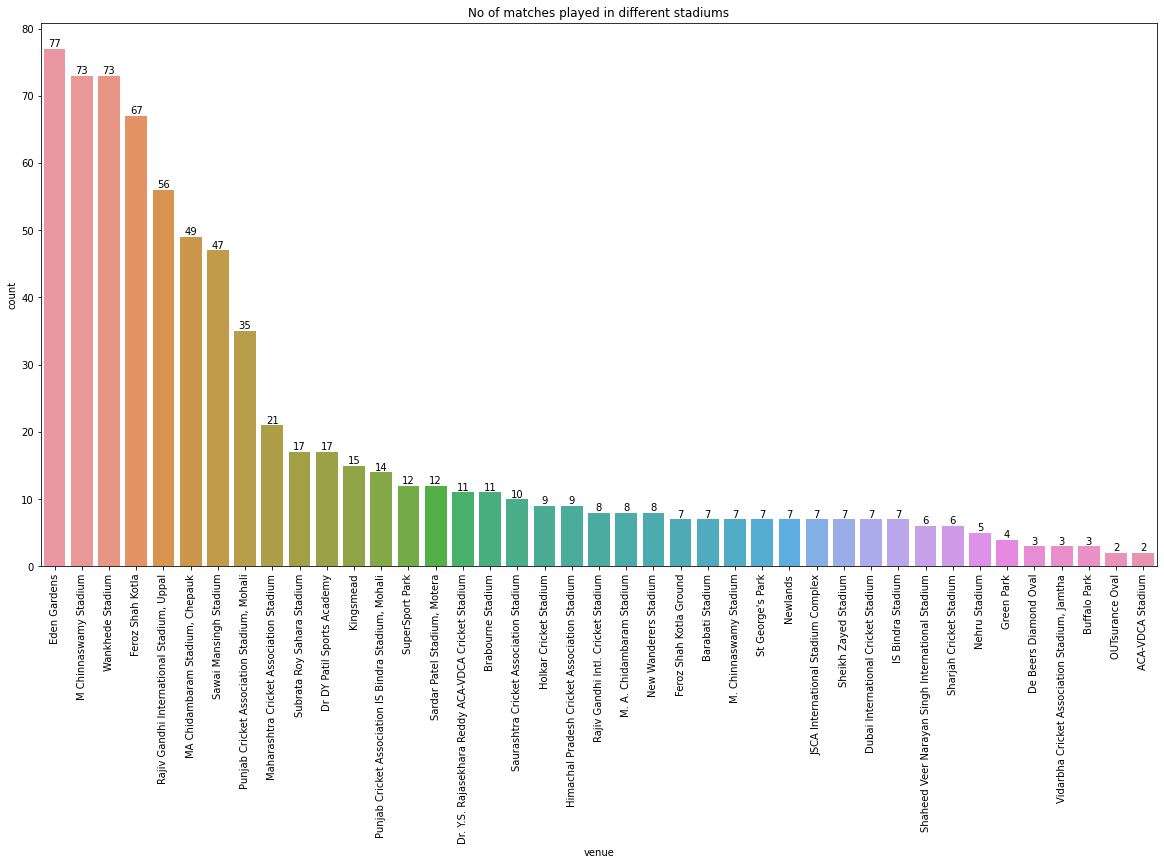

In [60]:
plt.figure(figsize=(20,10))
plt.title('No of matches played in different stadiums')
ax=sns.countplot(x=matches.venue,order = matches.venue.value_counts().index,)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+.3,i.get_height(),horizontalalignment='center')
plt.xticks(rotation=90)
plt.show()

### Most no of Man of matches

In [61]:
matches.player_of_match.value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

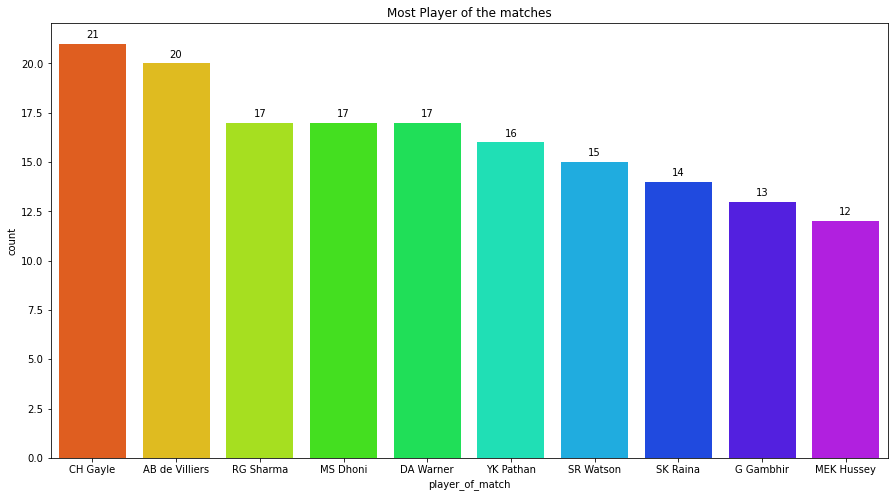

In [62]:
plt.figure(figsize=(15,8))
plt.title('Most Player of the matches')
ax=sns.countplot(matches.player_of_match,order = matches.player_of_match.value_counts().head(10).index,palette='gist_rainbow')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+.3,i.get_height(),horizontalalignment='center')
plt.show()

### Most balls faced

In [63]:
deliveries.batsman.value_counts().head(10)

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

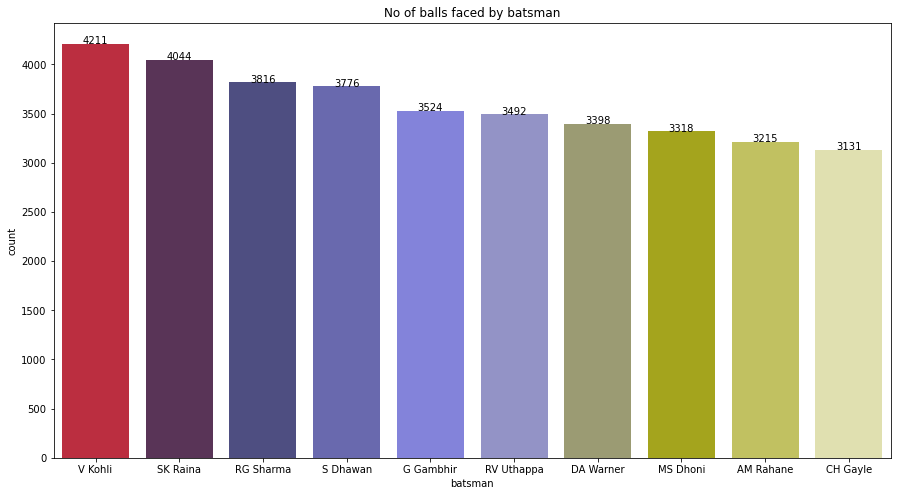

In [64]:
plt.figure(figsize=(15,8))
plt.title('No of balls faced by batsman')
ax=sns.countplot(deliveries.batsman,order = deliveries.batsman.value_counts().head(10).index,palette='gist_stern')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,i.get_height(),horizontalalignment='center')
plt.show()

### Most balls bowled

In [65]:
deliveries.bowler.value_counts().head(10)

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

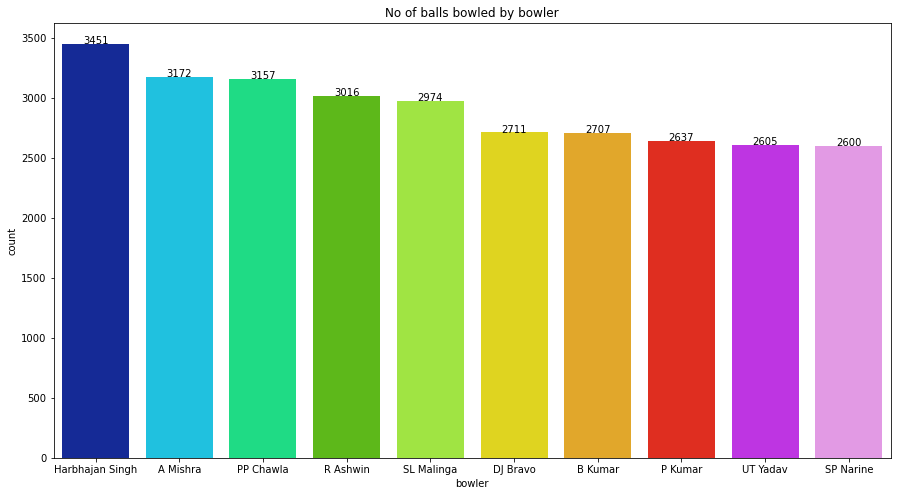

In [66]:
plt.figure(figsize=(15,8))
plt.title('No of balls bowled by bowler')
ax=sns.countplot(deliveries.bowler,order = deliveries.bowler.value_counts().head(10).index,palette='gist_ncar')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,i.get_height(),horizontalalignment='center')
plt.show()

### Most runs by batsman

In [67]:
high_run=deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:10]
high_run=pd.DataFrame(high_run)

In [68]:
high_run

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


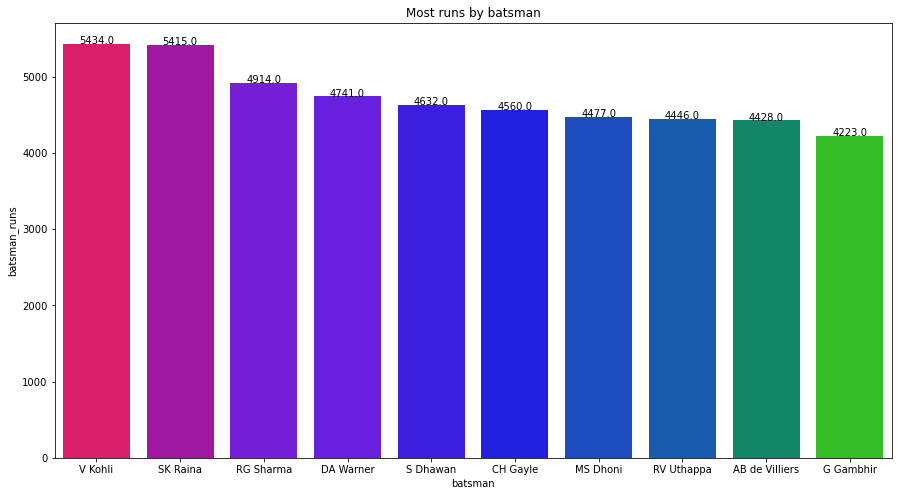

In [69]:
plt.figure(figsize=(15,8))
plt.title('Most runs by batsman')
ax=sns.barplot(data=high_run,y='batsman_runs',x=high_run.index,palette='prism')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,i.get_height(),horizontalalignment='center')
plt.show()

### Extra runs given by bowler

In [70]:
extra=deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False)[0:10]
extra=pd.DataFrame(extra)
extra

,extra_runs
bowler,
SL Malinga,293
P Kumar,236
UT Yadav,219
DJ Bravo,201
B Kumar,197
I Sharma,194
RP Singh,181
DW Steyn,171
SR Watson,171


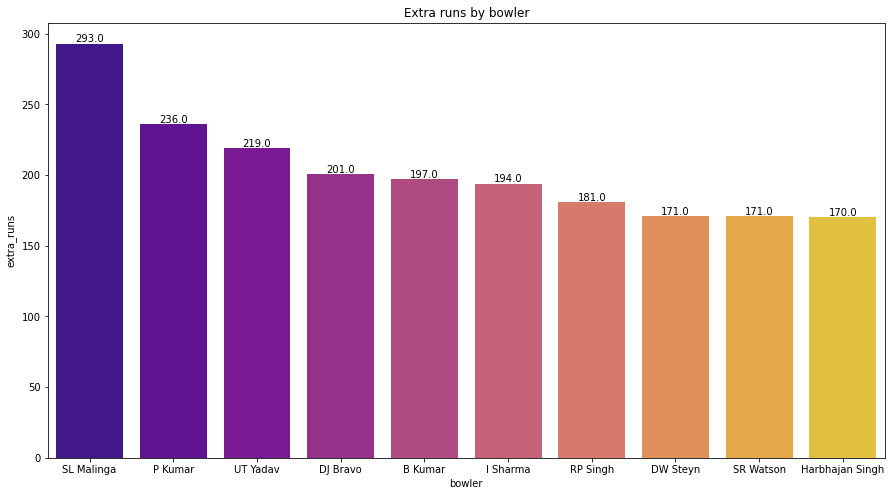

In [71]:
plt.figure(figsize=(15,8))
plt.title('Extra runs by bowler')
ax=sns.barplot(data=extra,y='extra_runs',x=extra.index,palette='plasma')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,i.get_height(),horizontalalignment='center')
plt.show()

### Most wickets taken by bowler

In [72]:
wicket=deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[0:10]
wicket=pd.DataFrame(wicket)
wicket

,player_dismissed
bowler,
SL Malinga,188
DJ Bravo,168
A Mishra,165
Harbhajan Singh,161
PP Chawla,156
B Kumar,141
R Ashwin,138
SP Narine,137
UT Yadav,136


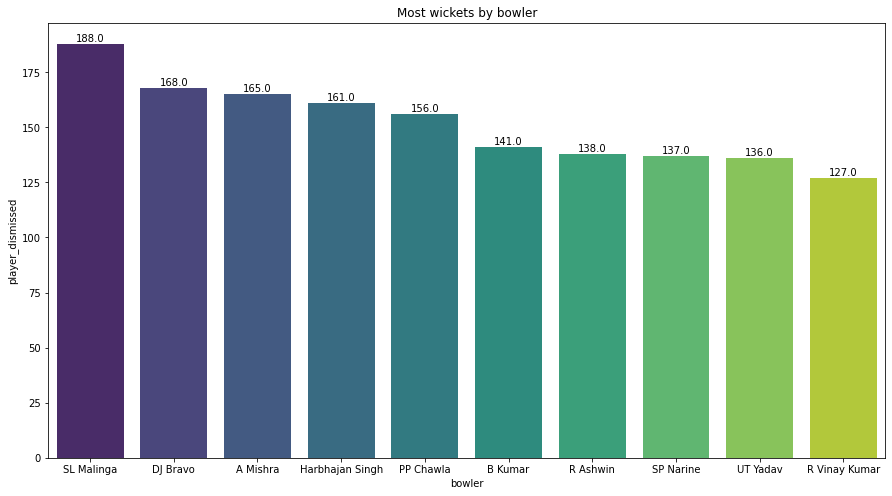

In [73]:
plt.figure(figsize=(15,8))
plt.title('Most wickets by bowler')
ax=sns.barplot(data=wicket,y='player_dismissed',x=wicket.index,palette='viridis')
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,i.get_height(),horizontalalignment='center')
plt.show()

### Wicket types

In [74]:
wkt_types=deliveries.dismissal_kind.value_counts()
wkt_types=pd.DataFrame(wkt_types)
wkt_types

,dismissal_kind
caught,5348
bowled,1581
run out,852
lbw,540
stumped,278
caught and bowled,211
retired hurt,12
hit wicket,10
obstructing the field,2


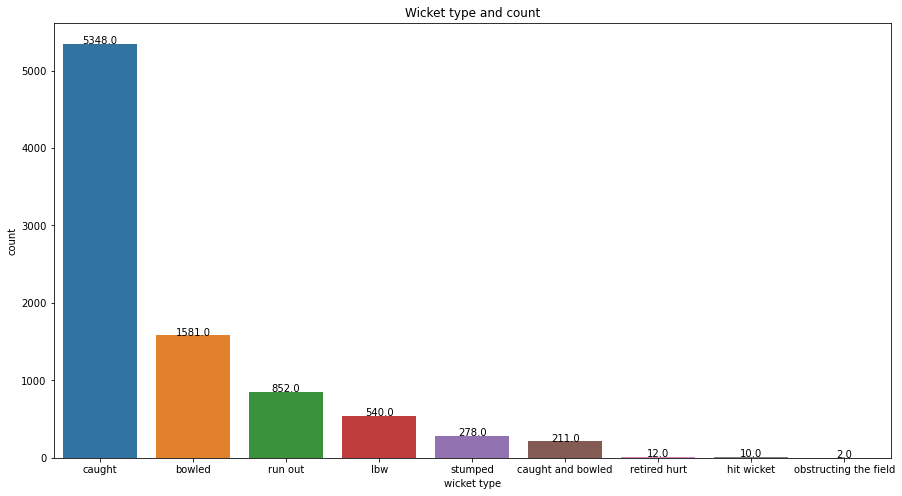

In [75]:
plt.figure(figsize=(15,8))
plt.title('Wicket type and count')
ax=sns.barplot(data=wkt_types,y='dismissal_kind',x=wkt_types.index)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,i.get_height(),horizontalalignment='center')
plt.xlabel('wicket type')
plt.ylabel('count')
plt.show()

#### Merging two datasets

In [76]:
df = pd.merge(matches,deliveries, left_on = 'id', right_on = 'match_id')
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'match_id', 'inning',
       'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

### Trends of top 3 Batsman

In [77]:
kohli=df[df['batsman']=='V Kohli'].groupby('season')['batsman_runs'].sum()
raina=df[df['batsman']=='SK Raina'].groupby('season')['batsman_runs'].sum()
rohit=df[df['batsman']=='RG Sharma'].groupby('season')['batsman_runs'].sum()

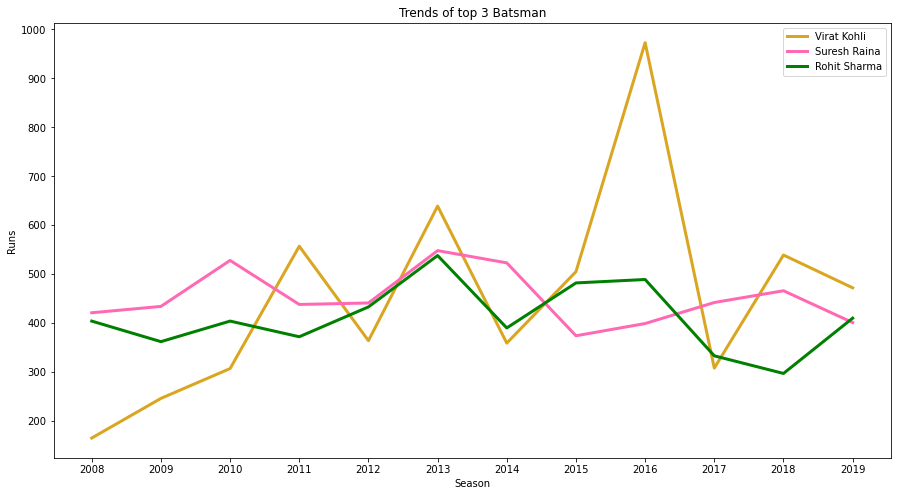

In [78]:
plt.figure(figsize=(15,8))
plt.plot(kohli, linewidth = 3,color = 'goldenrod', label = 'Virat Kohli')
plt.plot(raina, linewidth = 3,color = 'hotpink', label = 'Suresh Raina')
plt.plot(rohit, linewidth = 3,color = 'green', label = 'Rohit Sharma')
plt.xticks(df.season.unique())
plt.title('Trends of top 3 Batsman')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.legend()
plt.show()

### Trends of top 3 bowler

In [79]:
malinga=df[df['bowler']=='SL Malinga'].groupby('season')['player_dismissed'].count()
bravo=df[df['bowler']=='DJ Bravo'].groupby('season')['player_dismissed'].count()
mishra=df[df['bowler']=='A Mishra'].groupby('season')['player_dismissed'].count()

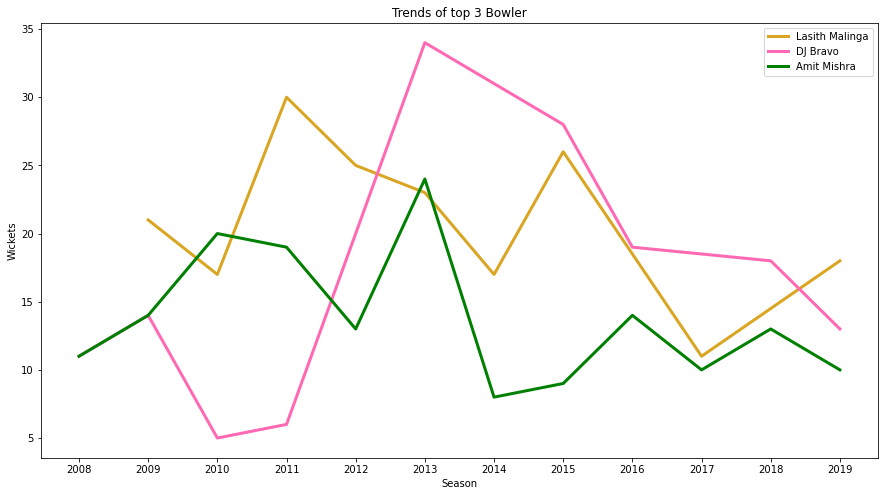

In [80]:
plt.figure(figsize=(15,8))
plt.plot(malinga, linewidth = 3,color = 'goldenrod', label = 'Lasith Malinga')
plt.plot(bravo, linewidth = 3,color = 'hotpink', label = 'DJ Bravo')
plt.plot(mishra, linewidth = 3,color = 'green', label = 'Amit Mishra')
plt.legend()
plt.xticks(df.season.unique())
plt.title('Trends of top 3 Bowler')
plt.xlabel('Season')
plt.ylabel('Wickets')
plt.show()

## Conclusion :

### 1.Most winning teams : Mumbai and Chennai

### 2.Best Playes (with most man of matches) : Chris Gayle and AB de Villiers

### 3.Top run scorers : Virat Kohli and Suresh Raina

### 4.Most wickets taken : Lasith Malinga and DJ Bravo

### 5.The teams that won the toss the most also seems to be almost the same as the teams that have won the most matches. So we can say that the winning the toss does have a positive effect in determining the team's victory.